Regression Machine Learning Project

Medical Insurance Cost Prediction




In [2]:
#collect data -> data analysis -> data preprocessing ->train_test_split -> Linear Regression Model -> new data -> Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [5]:
insurance_dataset=pd.read_csv('/content/insurance.csv')

In [6]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance_dataset.shape

(1338, 7)

In [9]:
#getting information about dataset

In [10]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
#sex,region and smoker are categorical columns
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [12]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-19-cc44df99013f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


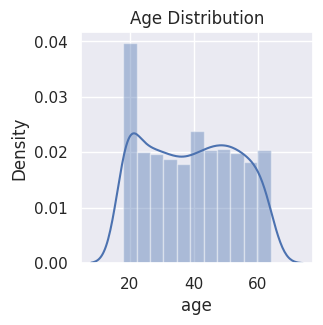

In [19]:
#distribution of each value
sns.set()
plt.figure(figsize=(3,3))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

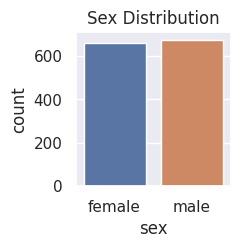

In [18]:
#Gender Column
plt.figure(figsize=(2,2))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [20]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-21-004075af8248>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


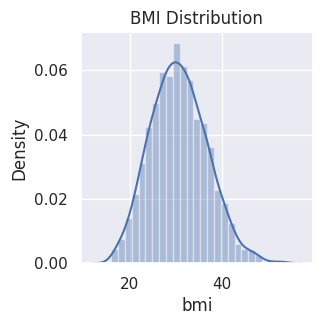

In [21]:
#bmi distribution
sns.set()
plt.figure(figsize=(3,3))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range ---> 18.5 to 24.9

Text(0.5, 1.0, 'Children')

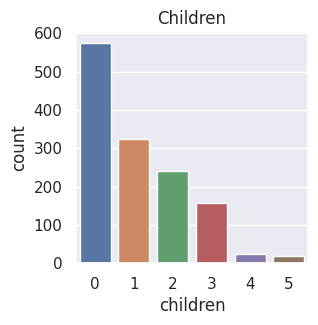

In [23]:
#children columns
plt.figure(figsize=(3,3))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')

In [24]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'smoker')

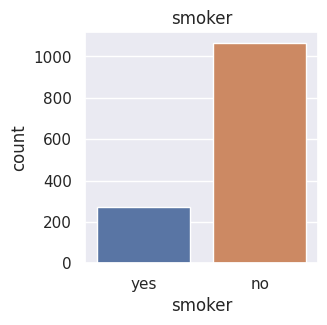

In [26]:
#smoker columns
plt.figure(figsize=(3,3))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')

In [28]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'region')

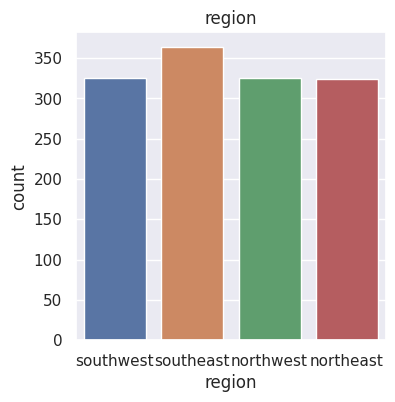

In [31]:
#region columns
plt.figure(figsize=(4,4))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')

In [32]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-34-d65523538bfb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


Text(0.5, 1.0, 'charges')

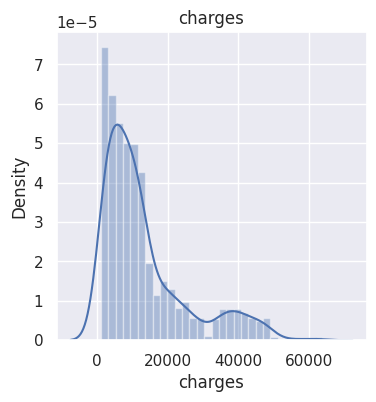

In [34]:
#region columns
plt.figure(figsize=(4,4))
sns.distplot(insurance_dataset['charges'])
plt.title('charges')

Data Pre-processing

Encoding

In [36]:
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

In [37]:
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [38]:
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

Splitting the featurs and Target

In [39]:
X=insurance_dataset.drop(columns = 'charges',axis=1)
Y=insurance_dataset['charges']

In [40]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [41]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [43]:
#splitting the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [45]:
X_train.shape

(1070, 6)

In [47]:
X_test.shape

(268, 6)

In [48]:
#Modelling Training
regressor = LinearRegression()

In [49]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [50]:
#model evaluation
#R score
#prediction on training dat

training_data_prediction = regressor.predict(X_train)

In [51]:
#R squared value
r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [52]:
r2_train

0.751505643411174

In [53]:
#prediction on testing data
test_data_prediction = regressor.predict(X_test)

In [55]:
#R squared value
r2_test = metrics.r2_score(Y_test,test_data_prediction)

In [56]:
r2_test

0.7447273869684076

In [63]:
#Building a predictive system
input_data = (31,1,25.74,0,1,0)
#changing  input_data to anumpy array
input_data_as_numpy_array = np.array(input_data)

In [64]:
#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [65]:
prediction = regressor.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [67]:
prediction

array([3760.0805765])